<a href="https://colab.research.google.com/github/Codehackerone/Time-series-analysis/blob/main/Time_Series_Forecasting(N-Beats).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Visualization and Preprocessing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
df = pd.read_csv("/content/drive/MyDrive/Tf_exercises/Aluminium Historical Data_2012.csv", index_col = ["Date"], parse_dates=["Date"])
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-06-22,"2,528.00","2,509.00","2,528.00","2,464.00",-,-0.22%
2022-06-21,"2,533.50","2,526.00","2,530.00","2,526.00",-,0.26%
2022-06-20,"2,527.00","2,488.00","2,482.00","2,481.00",21.89K,1.16%
2022-06-17,"2,498.00","2,500.00","2,500.00","2,500.00",40.74K,-0.26%
2022-06-16,"2,504.50","2,535.00","2,529.00","2,525.00",56.34K,-3.39%


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2028 entries, 2022-06-22 to 2014-06-16
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     2028 non-null   object
 1   Open      2028 non-null   object
 2   High      2028 non-null   object
 3   Low       2028 non-null   object
 4   Vol.      2028 non-null   object
 5   Change %  2028 non-null   object
dtypes: object(6)
memory usage: 110.9+ KB


In [93]:
# Reversing the df object to get lastest prices at last
df = df.iloc[::-1]
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2014-06-16,"1,840.25","1,840.25","1,840.25","1,840.25",19.29K,0.34%
2014-06-17,"1,852.00","1,852.00","1,852.00","1,852.00",45.55K,0.64%
2014-06-18,"1,874.50","1,874.50","1,874.50","1,874.50",26.12K,1.21%
2014-06-19,"1,890.50","1,890.50","1,890.50","1,890.50",26.66K,0.85%
2014-06-20,"1,888.50","1,888.50","1,888.50","1,888.50",18.51K,-0.11%


In [94]:
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df.head()

,Price,Open,High,Low
Date,,,,
2014-06-16,"1,840.25","1,840.25","1,840.25","1,840.25"
2014-06-17,"1,852.00","1,852.00","1,852.00","1,852.00"
2014-06-18,"1,874.50","1,874.50","1,874.50","1,874.50"
2014-06-19,"1,890.50","1,890.50","1,890.50","1,890.50"
2014-06-20,"1,888.50","1,888.50","1,888.50","1,888.50"


In [6]:
def convert_to_numeric(x):
  return (float)("".join(x.split(",")))

In [7]:
convert_to_numeric("41,234")

41234.0

In [95]:
for c in df.columns:
  df[c]=df[c].apply(convert_to_numeric)
df.head()

,Price,Open,High,Low
Date,,,,
2014-06-16,1840.25,1840.25,1840.25,1840.25
2014-06-17,1852.00,1852.00,1852.00,1852.00
2014-06-18,1874.50,1874.50,1874.50,1874.50
2014-06-19,1890.50,1890.50,1890.50,1890.50
2014-06-20,1888.50,1888.50,1888.50,1888.50


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2028 entries, 2014-06-16 to 2022-06-22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2028 non-null   float64
 1   Open    2028 non-null   float64
 2   High    2028 non-null   float64
 3   Low     2028 non-null   float64
dtypes: float64(4)
memory usage: 79.2 KB


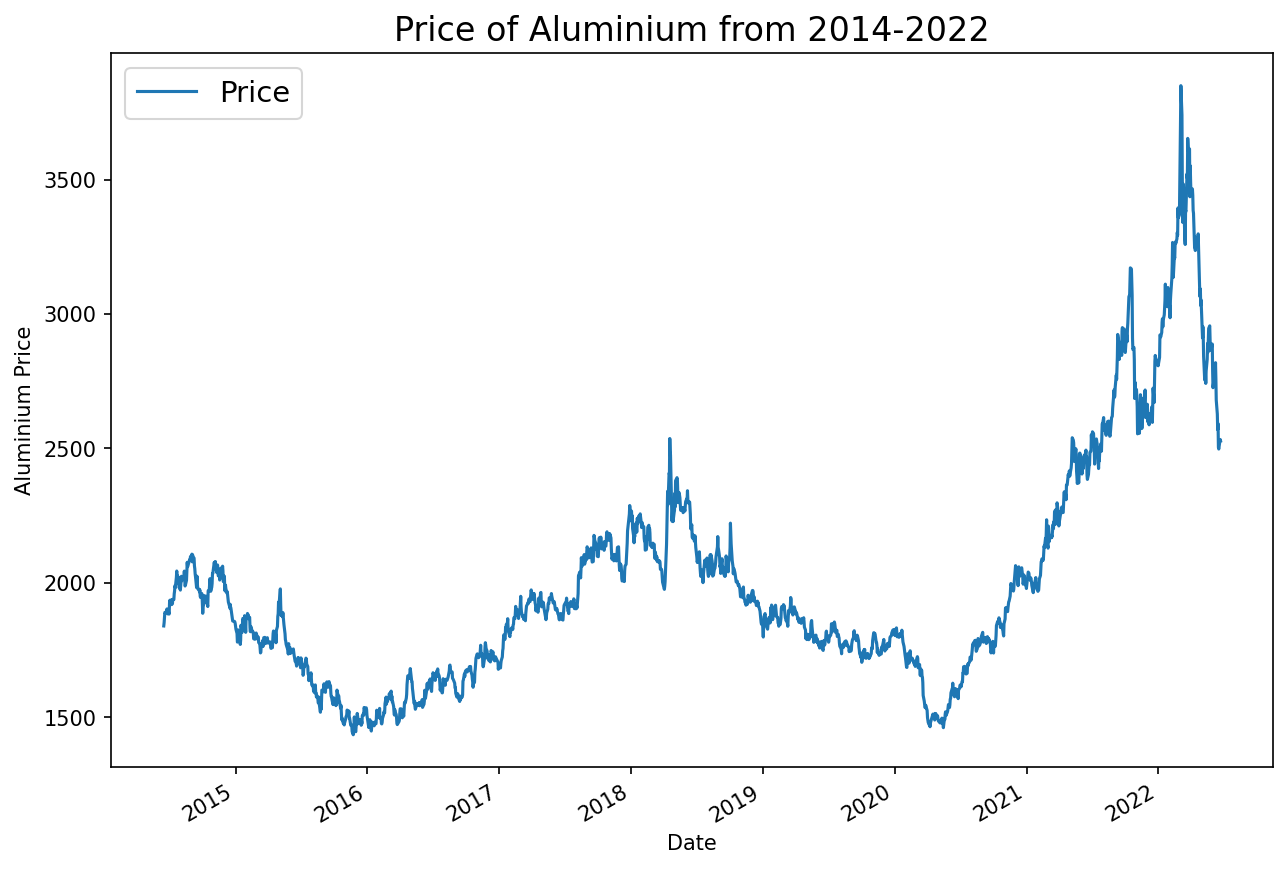

In [10]:
plt.figure(figsize=(10, 7), dpi=150)
df["Price"].plot()
plt.ylabel("Aluminium Price")
plt.title("Price of Aluminium from 2014-2022", fontsize=16)
plt.legend(fontsize=14);

In [11]:
timesteps = df.index.to_numpy()
prices = df["Price"].to_numpy()

In [12]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1622, 406, 1622, 406)

In [13]:
# Custom function to plot data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Al Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

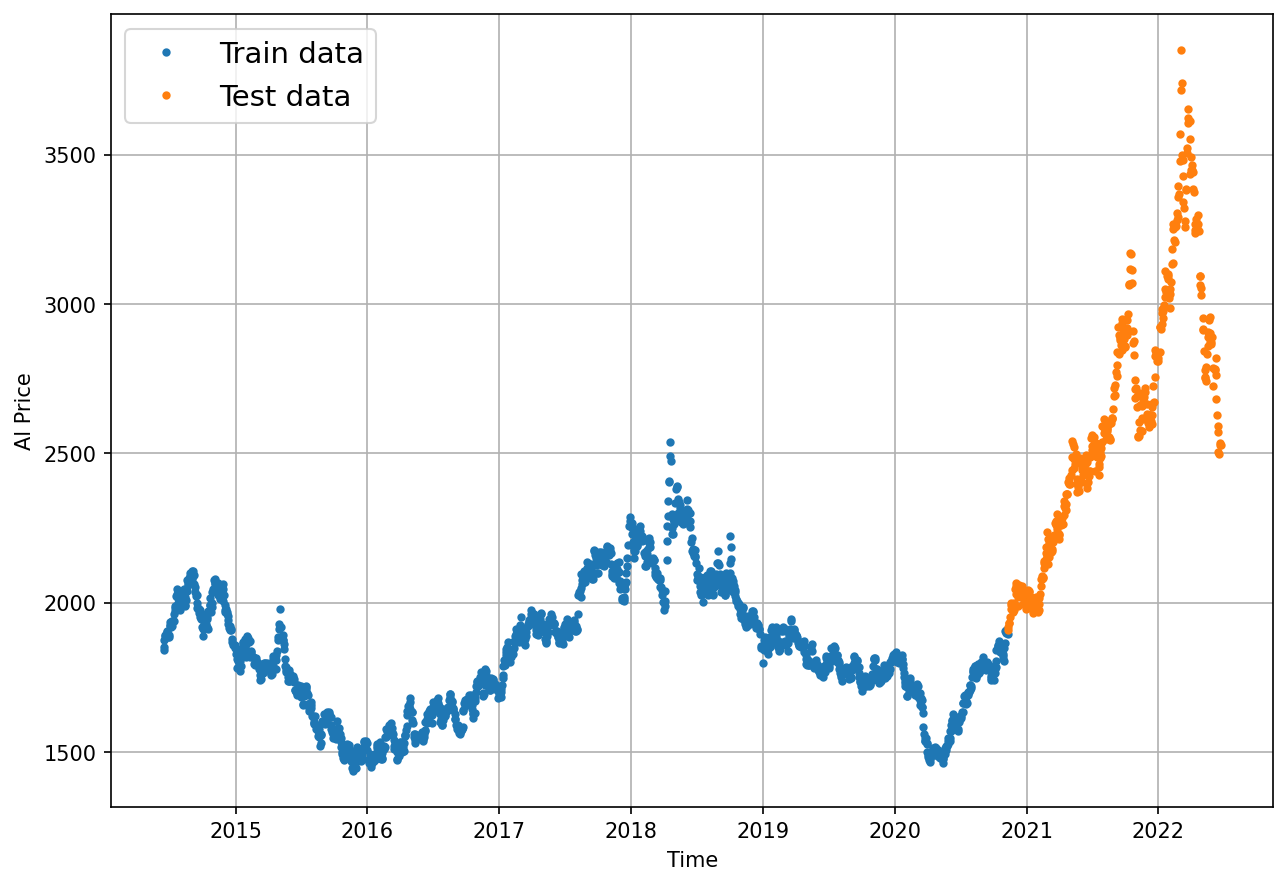

In [14]:
plt.figure(figsize=(10, 7), dpi=150)
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

# Models

### Naive Forecast

In [15]:
# Create a naïve forecast
naive_forecast = y_test[:-1] 
naive_forecast[:10], naive_forecast[-10:]

(array([1908. , 1918. , 1930. , 1932. , 1951. , 1977.5, 1998. , 1992.5,
        1993. , 1973.5]),
 array([2819. , 2761. , 2680. , 2628. , 2570. , 2592.5, 2504.5, 2498. ,
        2527. , 2533.5]))

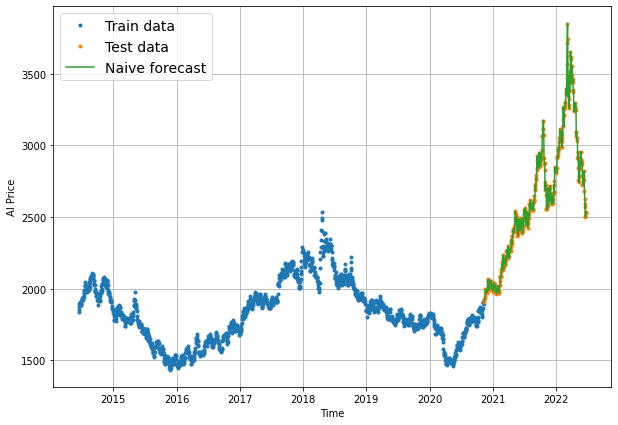

In [16]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast")

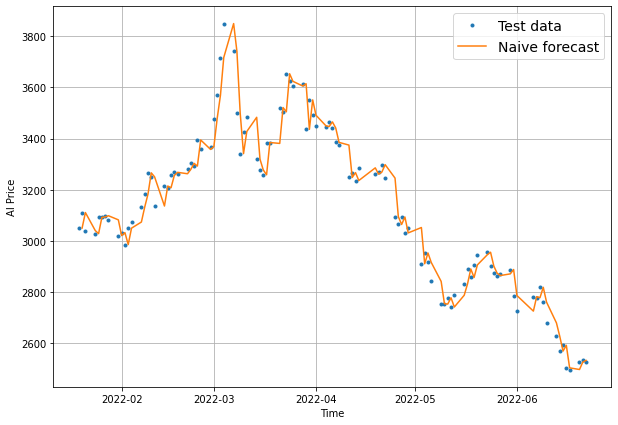

In [17]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

### Making Loss functions

In [18]:
import tensorflow as tf

In [19]:
# Calculating MASE
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # 1 coz shifting of 1 day

  return mae / mae_naive_no_season

In [20]:
# Custom function to calculate all the metrics
def evaluate_pred(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {
      "mae": mae.numpy(),
      "mse": mse.numpy(),
      "rmse": rmse.numpy(),
      "mape": mape.numpy(),
      "mase": mase.numpy()
      }

In [21]:
naive_results = evaluate_pred(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 34.160492,
 'mape': 1.2517097,
 'mase': 0.9982523,
 'mse': 2278.5,
 'rmse': 47.733635}

MAE here signifies that on average each forecast is ~$34 different than actual price.

In [22]:
# Average Price
tf.reduce_mean(y_test).numpy()

2623.369458128079

Although this seems good, but this is actually not. There are lots of reasons... explain you later

 Windowing dataset

### Windowing Dataset

In [23]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [24]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  
  return x[:, :-horizon], x[:, -horizon:]

In [25]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [26]:
# Create function to view Numpy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  windowed_array = x[window_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [27]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2021, 2021)

In [28]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [1840.25 1852.   1874.5  1890.5  1888.5  1892.5  1901.  ] -> Label: [1903.5]
Window: [1852.  1874.5 1890.5 1888.5 1892.5 1901.  1903.5] -> Label: [1898.]
Window: [1874.5 1890.5 1888.5 1892.5 1901.  1903.5 1898. ] -> Label: [1885.]


In [29]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [2761.  2680.  2628.  2570.  2592.5 2504.5 2498. ] -> Label: [2527.]
Window: [2680.  2628.  2570.  2592.5 2504.5 2498.  2527. ] -> Label: [2533.5]
Window: [2628.  2570.  2592.5 2504.5 2498.  2527.  2533.5] -> Label: [2528.]


In [30]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split))

  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  
  return train_windows, test_windows, train_labels, test_labels

In [31]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1616, 405, 1616, 405)

In [32]:
train_windows[:5], train_labels[:5]

(array([[1840.25, 1852.  , 1874.5 , 1890.5 , 1888.5 , 1892.5 , 1901.  ],
        [1852.  , 1874.5 , 1890.5 , 1888.5 , 1892.5 , 1901.  , 1903.5 ],
        [1874.5 , 1890.5 , 1888.5 , 1892.5 , 1901.  , 1903.5 , 1898.  ],
        [1890.5 , 1888.5 , 1892.5 , 1901.  , 1903.5 , 1898.  , 1885.  ],
        [1888.5 , 1892.5 , 1901.  , 1903.5 , 1898.  , 1885.  , 1890.75]]),
 array([[1903.5 ],
        [1898.  ],
        [1885.  ],
        [1890.75],
        [1884.5 ]]))

In [33]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0, 
                                            save_best_only=True) 

### Model 1

In [34]:
import tensorflow as tf
from tensorflow.keras import layers

model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])


model_1.fit(x=train_windows, # train windows of 7 timesteps
            y=train_labels, # horizon value of 1
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
13/13 [==============================] - 7s 113ms/step - loss: 306.8941 - mae: 306.8941 - val_loss: 224.7550 - val_mae: 224.7550
Epoch 2/100
13/13 [==============================] - 1s 78ms/step - loss: 80.9598 - mae: 80.9598 - val_loss: 88.3660 - val_mae: 88.3660
Epoch 3/100
13/13 [==============================] - 1s 97ms/step - loss: 47.6270 - mae: 47.6270 - val_loss: 67.4161 - val_mae: 67.4161
Epoch 4/100
13/13 [==============================] - 1s 78ms/step - loss: 33.0512 - mae: 33.0512 - val_loss: 58.7596 - val_mae: 58.7596
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 26.8101 - mae: 26.8101 - val_loss: 61.6072 - val_mae: 61.6072
Epoch 6/100
13/13 [==============================] - 0s 36ms/step - loss: 26.4419 - mae: 26.4419 - val_loss: 57.9593 - val_mae: 57.9593
Epoch 7/100
13/13 [==============================] - 0s 35ms/step - loss: 25.5565 - mae: 25.5565 - val_loss: 57.1250 - val_mae: 57.1250
Epoch 8/100
13/13 [=========================

In [35]:
model_1.evaluate(test_windows, test_labels)

13/13 [==============================] - 0s 3ms/step - loss: 37.7373 - mae: 37.7373


[37.7373161315918, 37.7373161315918]

In [36]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

13/13 [==============================] - 0s 4ms/step - loss: 37.7373 - mae: 37.7373


[37.7373161315918, 37.7373161315918]

In [37]:
def make_preds(model, input_data):
  
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) 

In [38]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(405, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([1912.6382, 1916.6526, 1924.6653, 1930.9417, 1948.8666, 1973.7596,
        1990.5117, 1992.2279, 1999.7817, 1995.972 ], dtype=float32)>)

In [40]:
model_1_results = evaluate_pred(y_true=tf.squeeze(test_labels), y_pred=model_1_preds)
model_1_results

{'mae': 37.737316,
 'mape': 1.3833482,
 'mase': 1.1027758,
 'mse': 2966.1206,
 'rmse': 54.4621}

In [41]:
naive_results

{'mae': 34.160492,
 'mape': 1.2517097,
 'mase': 0.9982523,
 'mse': 2278.5,
 'rmse': 47.733635}

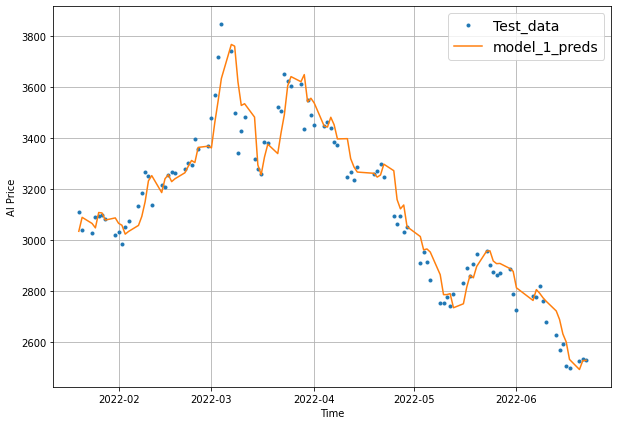

In [42]:
offset = 300
plt.figure(figsize=(10, 7))
 
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

### Model 2:Dense

In [43]:
HORIZON = 1 
WINDOW_SIZE = 30 

In [44]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1998, 1998)

In [45]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1598, 400, 1598, 400)

In [46]:
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) 
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [47]:
model_2.evaluate(test_windows, test_labels)

13/13 [==============================] - 0s 2ms/step - loss: 85.4250


85.42504119873047

In [48]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

13/13 [==============================] - 0s 3ms/step - loss: 49.2126


49.212581634521484

In [49]:
model_2_preds = make_preds(model_2, input_data=test_windows)

In [51]:
model_2_results = evaluate_pred(y_true=tf.squeeze(test_labels), y_pred=model_2_preds)
model_2_results

{'mae': 49.21258,
 'mape': 1.792409,
 'mase': 1.4285792,
 'mse': 4967.012,
 'rmse': 70.477036}

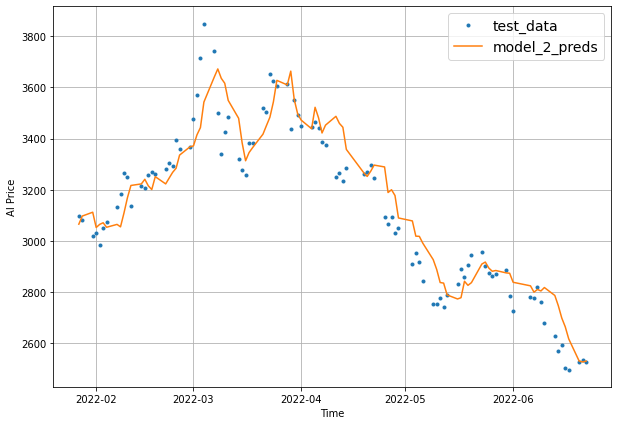

In [52]:
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds") 

### Model 3:Dense

In [53]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1992, 1992)

In [54]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1593, 399, 1593, 399)

In [55]:
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [56]:
model_3.evaluate(test_windows, test_labels)

13/13 [==============================] - 0s 3ms/step - loss: 82.2068


82.20679473876953

In [57]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

13/13 [==============================] - 0s 3ms/step - loss: 79.8817


79.88169860839844

In [58]:
model_3_preds = make_preds(model_3, input_data=test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[1927.1733, 1911.7448, 1910.8645, 1903.4244, 1908.543 , 1892.412 ,
        1885.4973],
       [1923.8088, 1910.0784, 1922.2267, 1914.8711, 1917.5865, 1899.8018,
        1885.0867],
       [1940.7292, 1911.4701, 1922.7607, 1916.3046, 1922.2109, 1909.5955,
        1906.1923],
       [1934.408 , 1925.3289, 1926.0265, 1923.7502, 1940.282 , 1911.9185,
        1910.1086],
       [1935.9412, 1938.4233, 1940.1998, 1917.067 , 1937.011 , 1910.9734,
        1923.643 ]], dtype=float32)>

In [60]:
model_3_results = evaluate_pred(y_true=tf.squeeze(test_labels), y_pred=model_3_preds)
model_3_results

{'mae': array([ 53.95534 ,  57.220005,  57.956455,  57.168194,  55.39162 ,
         40.855938,  23.127163,  22.300503,  32.457134,  39.042583,
         38.634296,  42.856182,  43.117607,  34.93333 ,  23.32352 ,
         17.87697 ,  21.707642,  16.297852,  30.298252,  20.516897,
         20.453108,  14.104178,  15.449271,  25.075998,  24.738718,
         23.185337,  28.622925,  40.632603,  53.25633 ,  50.044575,
         33.259033,  26.219116,  24.390224,  21.984636,  16.064802,
         12.339513,  10.763655,  13.169957,  17.988699,  33.79016 ,
         33.70691 ,  46.41797 ,  45.012363,  47.967216,  45.37901 ,
         33.978497,  22.97869 ,  14.877406,  14.53132 ,  17.07645 ,
         16.511597,  27.584751,  33.308525,  30.01409 ,  31.437134,
         35.686787,  34.824444,  44.482002,  57.845127,  66.65932 ,
         72.263374,  76.16985 ,  74.69965 ,  67.80962 ,  60.792305,
         56.41462 ,  65.90597 ,  74.45037 ,  67.17589 ,  50.854145,
         52.82837 ,  44.889927,  39.53355

In [61]:
def evaluate_pred(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [63]:
model_3_results = evaluate_pred(y_true=tf.squeeze(test_labels), y_pred=model_3_preds)
model_3_results

{'mae': 79.8817,
 'mape': 2.8889167,
 'mase': 2.316026,
 'mse': 13354.599,
 'rmse': 90.90313}

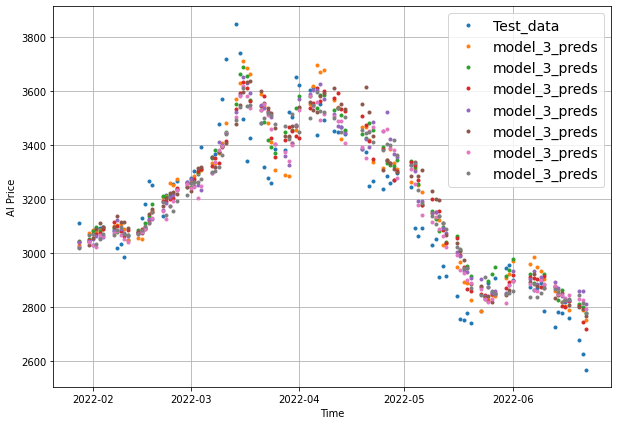

In [64]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")

plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

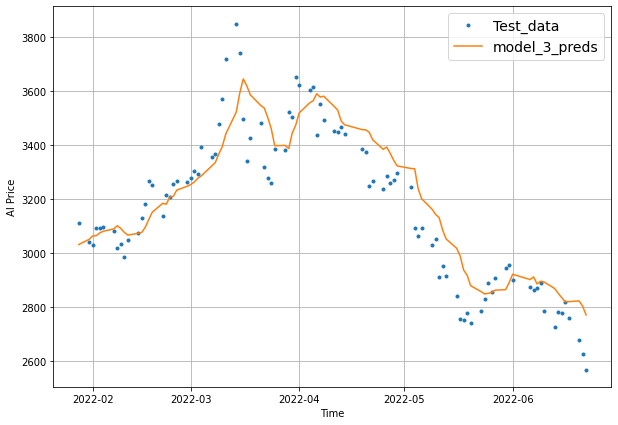

In [65]:
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")

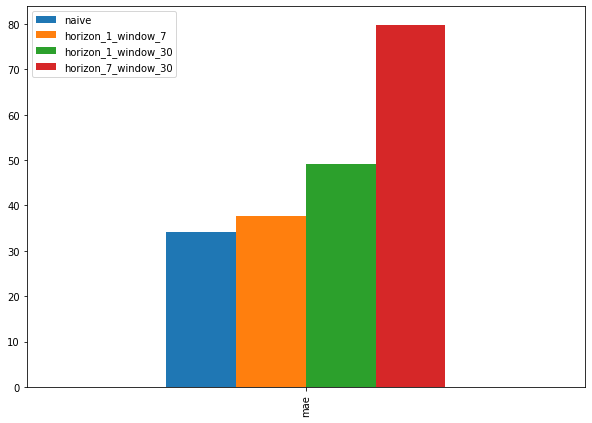

In [66]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

### Model 4:Conv1D

In [67]:
HORIZON = 1 
WINDOW_SIZE = 7 

In [68]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2021, 2021)

In [69]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1616, 405, 1616, 405)

In [70]:
train_windows[0].shape

(7,)

In [71]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) 
print(f"Original shape: {x.shape}") 
print(f"Expanded shape: {expand_dims_layer(x).shape}") 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[1840.25]
 [1852.  ]
 [1874.5 ]
 [1890.5 ]
 [1888.5 ]
 [1892.5 ]
 [1901.  ]]


In [72]:
model_4 = tf.keras.Sequential([
  
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), 
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets wr

In [73]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [74]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

13/13 [==============================] - 0s 3ms/step - loss: 45.2114


45.21139907836914

In [75]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1903.972 , 1911.2341, 1919.499 , 1925.4095, 1936.7454, 1952.5012,
       1970.9586, 1981.6631, 1989.2675, 1986.9312], dtype=float32)>

In [77]:
model_4_results = evaluate_pred(y_true=tf.squeeze(test_labels), y_pred=model_4_preds)
model_4_results

{'mae': 45.2114,
 'mape': 1.6415132,
 'mase': 1.3211865,
 'mse': 4122.144,
 'rmse': 64.203926}

### Model 5:RNN(LSTM)

In [78]:
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)

x = layers.LSTM(128, activation="relu")(x) 

output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


In [79]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

13/13 [==============================] - 0s 2ms/step - loss: 52.6221


52.62206268310547

In [80]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1905.2227, 1912.7666, 1918.2004, 1922.3892, 1930.67  , 1944.2538,
       1961.3119, 1972.4146, 1980.1195, 1982.3242], dtype=float32)>

In [81]:
model_5_results = evaluate_pred(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 52.622066,
 'mape': 1.9010305,
 'mase': 1.5377442,
 'mse': 5537.206,
 'rmse': 74.41241}

### Model 6:N-BEATS algorithm

In [82]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): 
    x = inputs 
    for layer in self.hidden: 
      x = layer(x)
    theta = self.theta_layer(x) 
    
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [83]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [84]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) 

In [86]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-1.1362197   0.11789899  0.18217556 -0.18985249  0.7168988   0.71162856
  0.11447002]
Forecast: 0.8483157753944397


In [88]:
HORIZON = 1 
WINDOW_SIZE = 7 

In [96]:
df.head()

,Price,Open,High,Low
Date,,,,
2014-06-16,1840.25,1840.25,1840.25,1840.25
2014-06-17,1852.00,1852.00,1852.00,1852.00
2014-06-18,1874.50,1874.50,1874.50,1874.50
2014-06-19,1890.50,1890.50,1890.50,1890.50
2014-06-20,1888.50,1888.50,1888.50,1888.50


In [99]:
df = df.drop(['Open', 'High', 'Low'], axis=1)
df.head()

,Price
Date,
2014-06-16,1840.25
2014-06-17,1852.00
2014-06-18,1874.50
2014-06-19,1890.50
2014-06-20,1888.50


In [101]:
al_prices_nbeats = df.copy()
for i in range(WINDOW_SIZE):
  al_prices_nbeats[f"Price+{i+1}"] = al_prices_nbeats["Price"].shift(periods=i+1)
al_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-06-25,1903.50,1901.00,1892.5,1888.5,1890.5,1874.5,1852.0,1840.25
2014-06-26,1898.00,1903.50,1901.0,1892.5,1888.5,1890.5,1874.5,1852.00
2014-06-27,1885.00,1898.00,1903.5,1901.0,1892.5,1888.5,1890.5,1874.50
2014-06-30,1890.75,1885.00,1898.0,1903.5,1901.0,1892.5,1888.5,1890.50
2014-07-01,1884.50,1890.75,1885.0,1898.0,1903.5,1901.0,1892.5,1888.50


In [102]:
X = al_prices_nbeats.dropna().drop("Price", axis=1)
y = al_prices_nbeats.dropna()["Price"]


split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1616, 1616, 405, 405)

In [103]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [104]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [105]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1, tensor_2])

added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [109]:
tf.random.set_seed(42)

nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

residuals, forecast = nbeats_block_layer(stack_input)

for i, _ in enumerate(range(N_STACKS-1)): 

  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals)

  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

model_6 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])


model_6.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, 
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 288: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1068: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1168: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.


In [110]:
model_6.evaluate(test_dataset)

1/1 [==============================] - 0s 32ms/step - loss: 34.7438 - mae: 34.7438 - mse: 2430.0208


[34.74375915527344, 34.74375915527344, 2430.020751953125]

In [111]:
model_6_preds = make_preds(model_6, test_dataset)
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1907.2146, 1919.0363, 1932.2697, 1936.708 , 1952.1741, 1976.3799,
       1999.3396, 2000.4591, 1998.8655, 1979.6648], dtype=float32)>

In [114]:
model_6_results = evaluate_pred(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 34.74376,
 'mape': 1.2725866,
 'mase': 1.0152968,
 'mse': 2430.0208,
 'rmse': 49.295242}

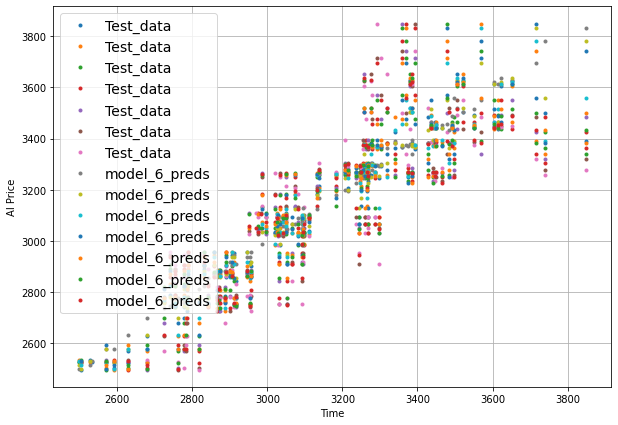

In [116]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")

plot_time_series(timesteps=X_test[-len(test_windows):], values=model_6_preds, start=offset, label="model_6_preds")

In [117]:
naive_results, model_6_results

({'mae': 34.160492,
  'mape': 1.2517097,
  'mase': 0.9982523,
  'mse': 2278.5,
  'rmse': 47.733635},
 {'mae': 34.74376,
  'mape': 1.2725866,
  'mase': 1.0152968,
  'mse': 2430.0208,
  'rmse': 49.295242})

Still not better model than naive 😑🤐